In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [2]:
# Droping Dupicated columns if True

df.drop_duplicates(inplace = True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [3]:
df.reset_index(drop = True,inplace= True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223238,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
223239,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
223240,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
223241,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [4]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.dtypes

Diabetes_binary         float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,223243.00000,223243.000000,223243.000000,223243.00000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,...,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000
mean,0.14959,0.431642,0.410812,0.96145,29.134414,0.426213,0.041175,0.091174,0.766864,0.607643,...,0.960424,0.067478,2.527385,4.159127,3.969688,0.162836,0.475840,7.868592,5.103515,6.832017
std,0.35667,0.495306,0.491982,0.19252,6.646068,0.494527,0.198695,0.287857,0.422829,0.488277,...,0.194961,0.250849,1.028733,8.055095,8.432426,0.369217,0.499417,3.257768,0.952150,2.378397
min,0.00000,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,0.000000,1.00000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.00000,0.000000,0.000000,1.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.00000,1.000000,1.000000,1.00000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.00000,1.000000,1.000000,1.00000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223243 entries, 0 to 223242
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       223243 non-null  float64
 1   HighBP                223243 non-null  int64  
 2   HighChol              223243 non-null  float64
 3   CholCheck             223243 non-null  int64  
 4   BMI                   223243 non-null  float64
 5   Smoker                223243 non-null  float64
 6   Stroke                223243 non-null  float64
 7   HeartDiseaseorAttack  223243 non-null  float64
 8   PhysActivity          223243 non-null  int64  
 9   Fruits                223243 non-null  int64  
 10  Veggies               223243 non-null  int64  
 11  HvyAlcoholConsump     223243 non-null  int64  
 12  AnyHealthcare         223243 non-null  int64  
 13  NoDocbcCost           223243 non-null  float64
 14  GenHlth               223243 non-null  float64
 15  

# Visualization

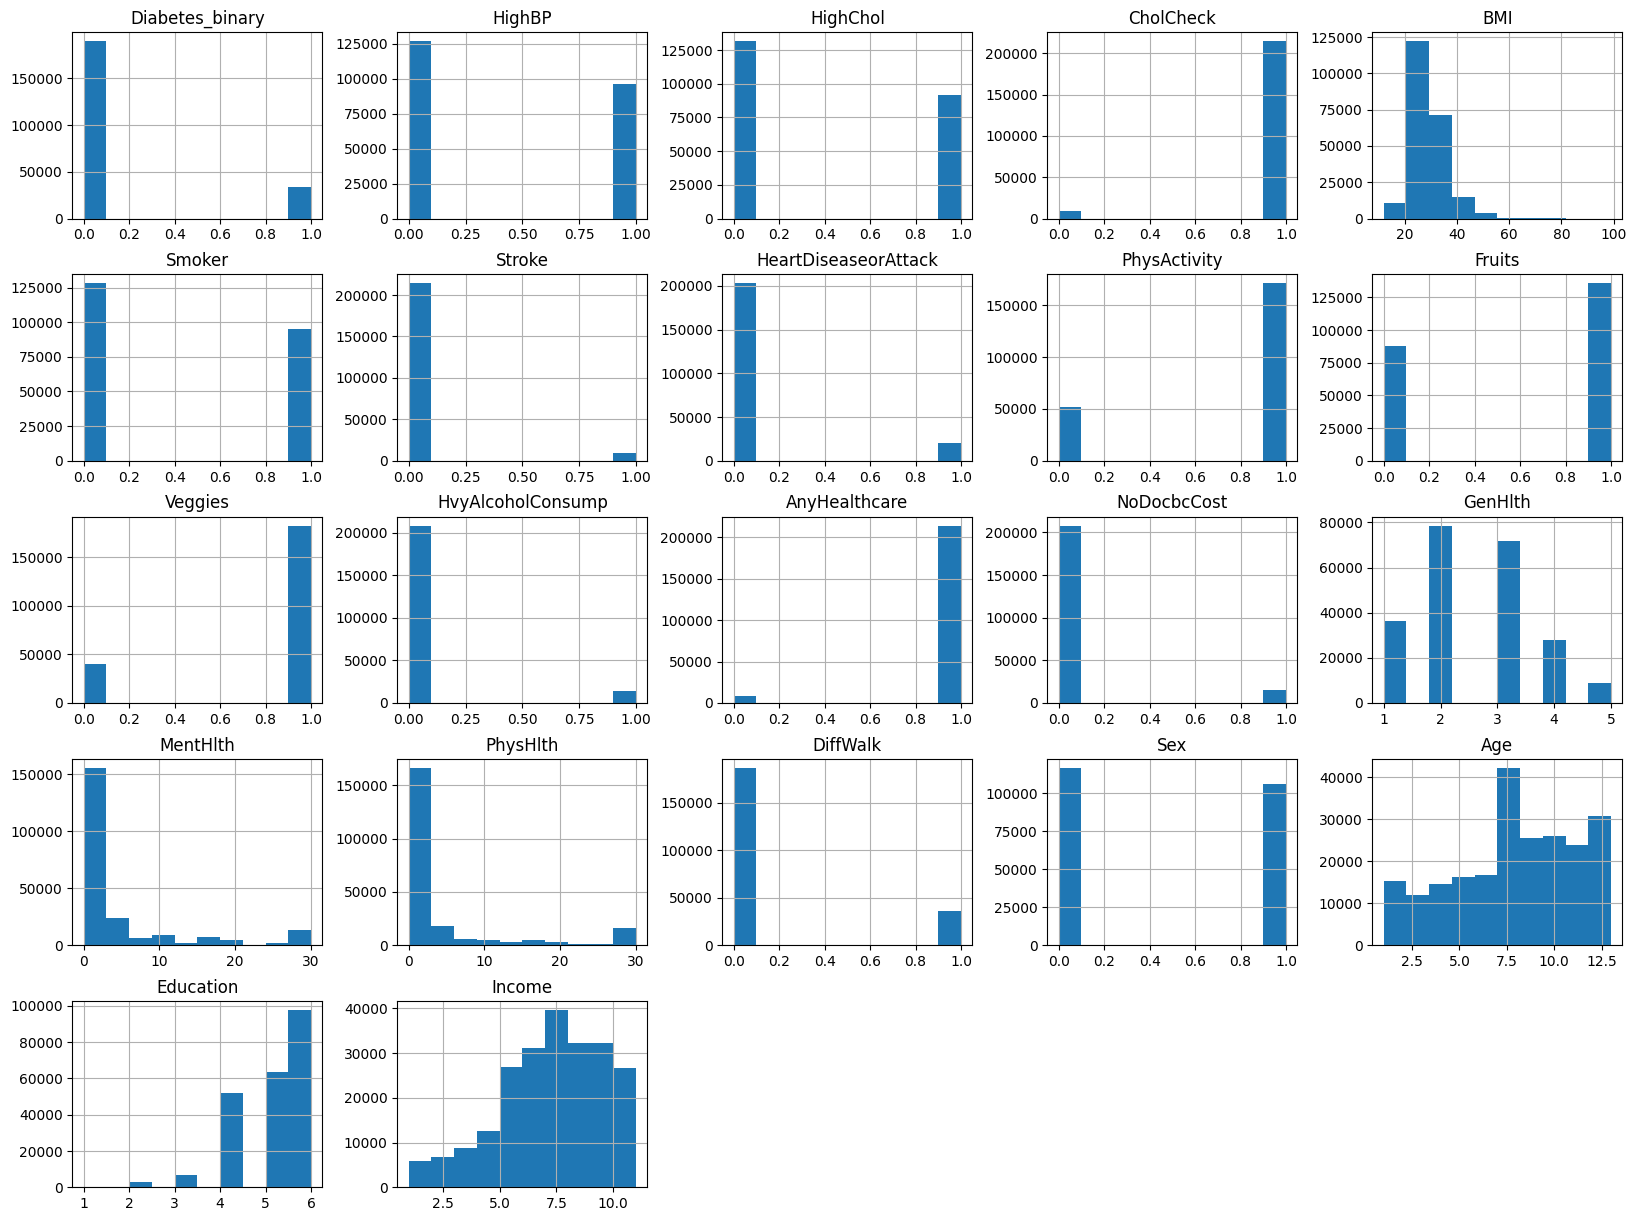

In [8]:
df.hist(figsize = (20,15))
plt.show()


1. we can see here the value counts of all 22 columns.

2. some of them columns are continuous column and some of them are discrete columns.

3. we can see here the Frequency of values in diffrent columns



**Correlation between columns**

In [9]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.255750,0.194415,0.073088,0.193560,0.047151,0.097970,0.170951,-0.138871,-0.018654,...,0.032121,0.007739,0.269815,0.026139,0.152252,0.202905,0.036849,0.194307,-0.090391,-0.140398
HighBP,0.255750,1.000000,0.273910,0.106480,0.202854,0.085947,0.124365,0.199827,-0.122232,-0.018986,...,0.056340,-0.014791,0.265983,-0.000652,0.132979,0.202642,0.067519,0.345364,-0.090536,-0.133421
HighChol,0.194415,0.273910,1.000000,0.103972,0.077711,0.073251,0.084490,0.169009,-0.069679,-0.016139,...,0.061483,-0.017440,0.175613,0.012063,0.099847,0.123772,0.026822,0.284168,-0.024131,-0.055145
CholCheck,0.073088,0.106480,0.103972,1.000000,0.041555,-0.008140,0.027560,0.047095,-0.013777,0.020746,...,0.153645,-0.069221,0.051402,-0.010871,0.036263,0.049682,-0.050173,0.104990,0.024604,0.015441
BMI,0.193560,0.202854,0.077711,0.041555,1.000000,0.000947,0.004815,0.032094,-0.153145,-0.076819,...,-0.004306,0.041639,0.237996,0.077107,0.110753,0.191208,0.002109,-0.053822,-0.081918,-0.085963
Smoker,0.047151,0.085947,0.073251,-0.008140,0.000947,1.000000,0.052529,0.105128,-0.081263,-0.059096,...,-0.018418,0.040462,0.147932,0.073303,0.103431,0.114700,0.075547,0.121648,-0.161919,-0.130663
Stroke,0.097970,0.124365,0.084490,0.027560,0.004815,0.052529,1.000000,0.175426,-0.073579,0.005335,...,0.017782,0.018850,0.155228,0.039911,0.127620,0.158769,0.002170,0.131614,-0.055417,-0.110019
HeartDiseaseorAttack,0.170951,0.199827,0.169009,0.047095,0.032094,0.105128,0.175426,1.000000,-0.090599,0.000894,...,0.028537,0.010208,0.233550,0.027122,0.164853,0.189224,0.088515,0.227541,-0.071959,-0.116598
PhysActivity,-0.138871,-0.122232,-0.069679,-0.013777,-0.153145,-0.081263,-0.073579,-0.090599,1.000000,0.106626,...,0.019358,-0.042783,-0.270476,-0.103503,-0.238520,-0.275541,0.058559,-0.121717,0.197833,0.226611
Fruits,-0.018654,-0.018986,-0.016139,0.020746,-0.076819,-0.059096,0.005335,0.000894,0.106626,1.000000,...,0.014377,-0.022840,-0.061959,-0.046342,-0.020573,-0.018437,-0.053927,0.072726,0.070470,0.035935


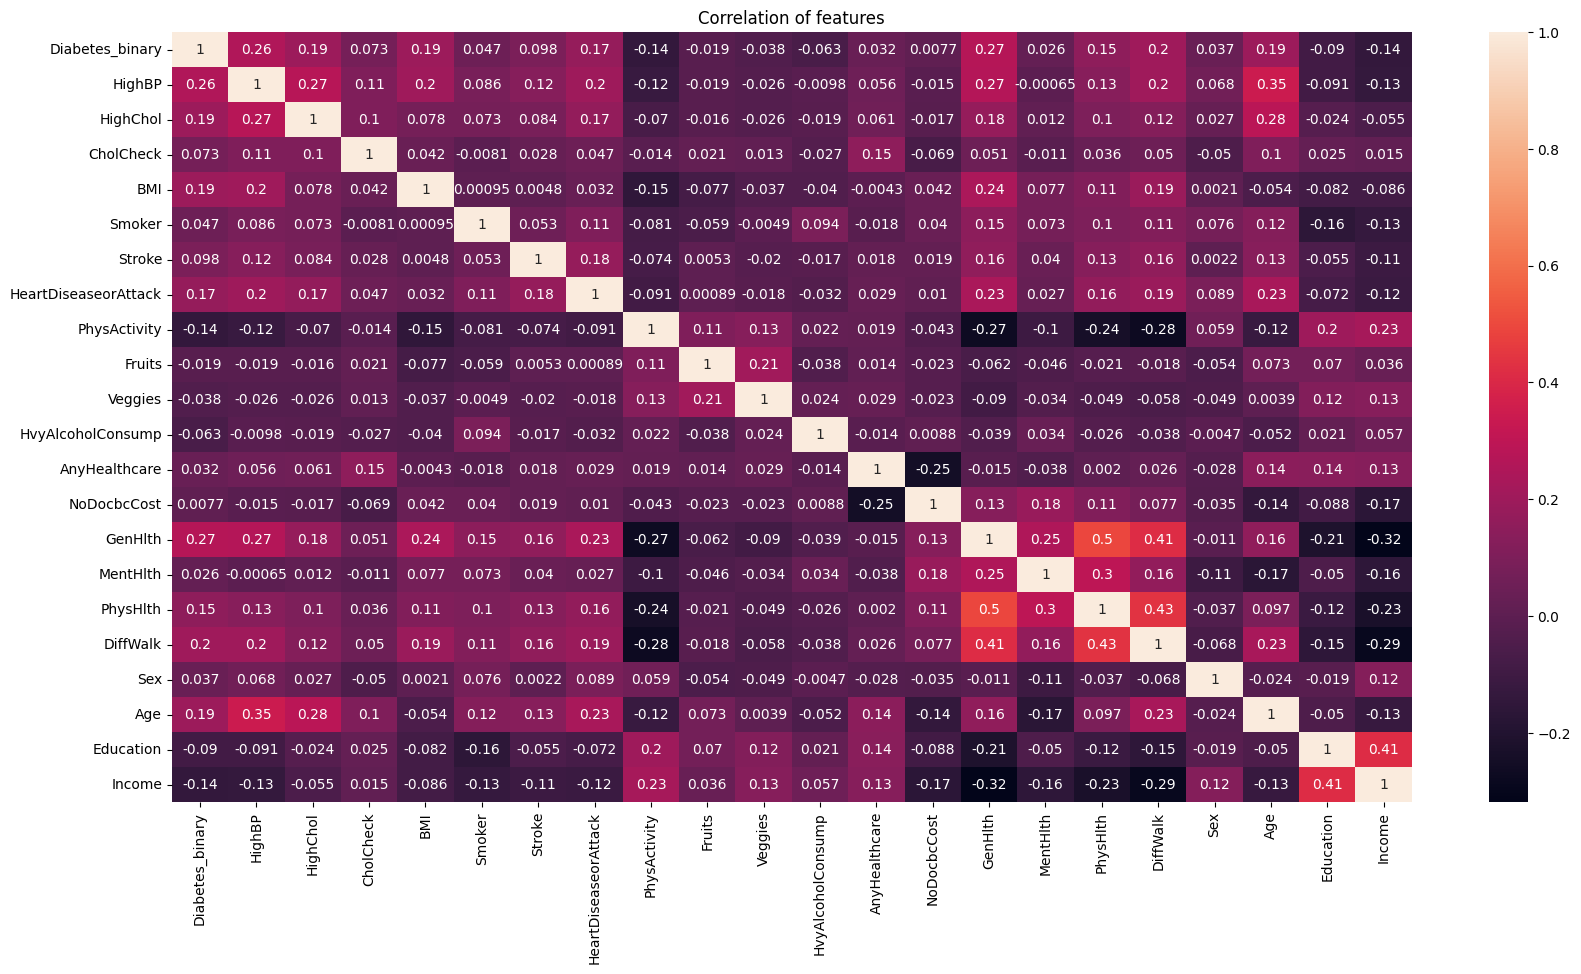

In [10]:
# using heatmap we can understand the correlation between columns in a better way

# Heatmap of correltaion
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation of features")
plt.show()

1. GenHlth and PhysHlth are highly correleted with each other.(positive relation)
2. GenHlth and Income are highly correleted with each other .(negetive relation)

**correlation with Diabetes_binary through bar graph**

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

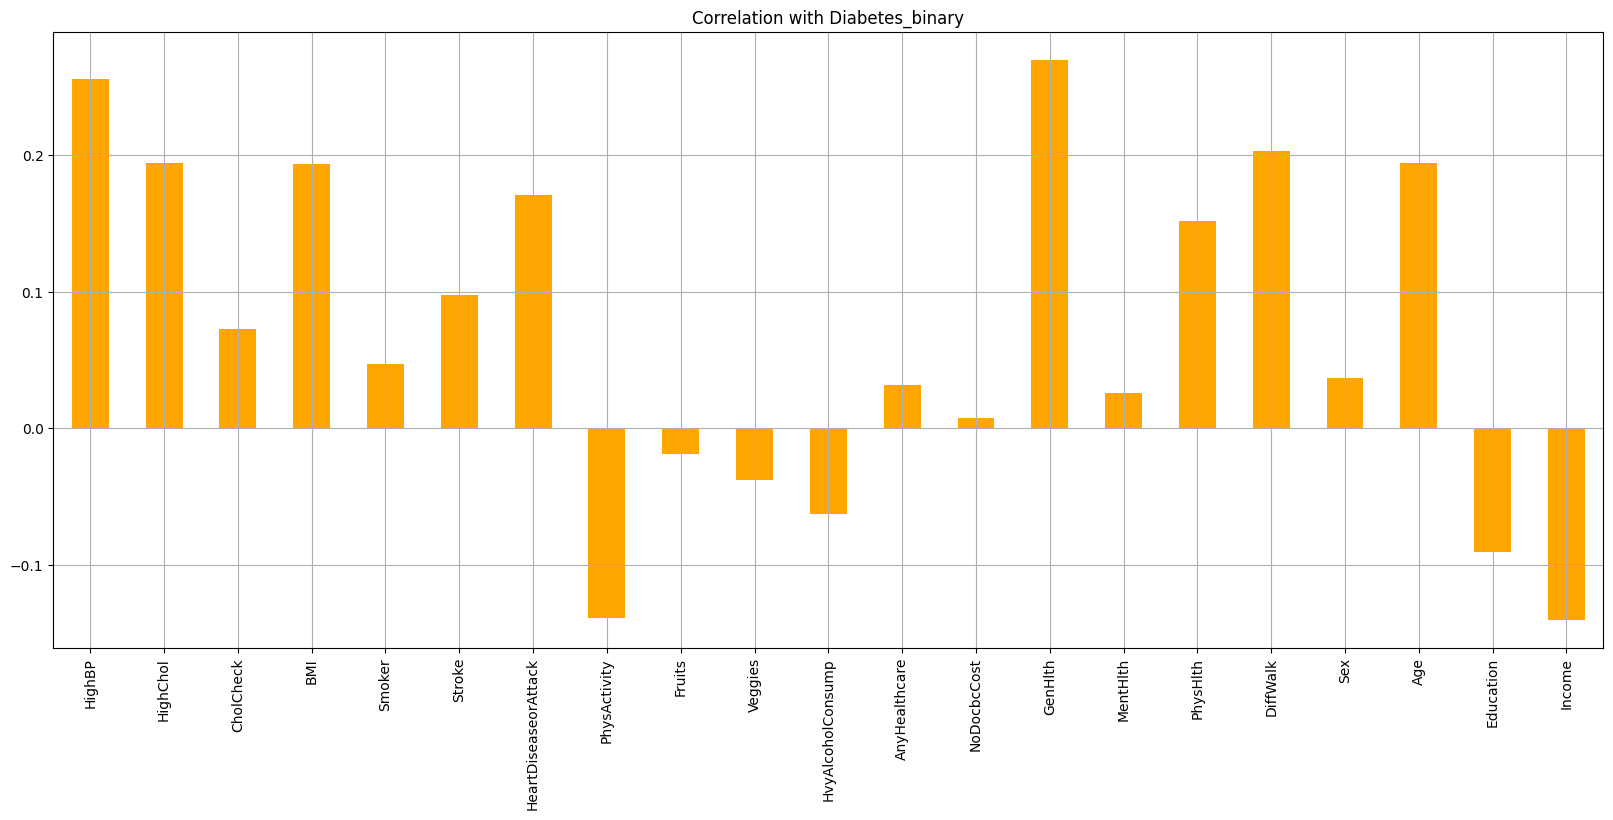

In [11]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Orange")

Results:

1. Fruits , AnyHealthcare , NoDocbccost , Veggies and MentHith are least correlated with Diabetes_binary.
2.  HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity ,  HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.


**Diabetes_binary**

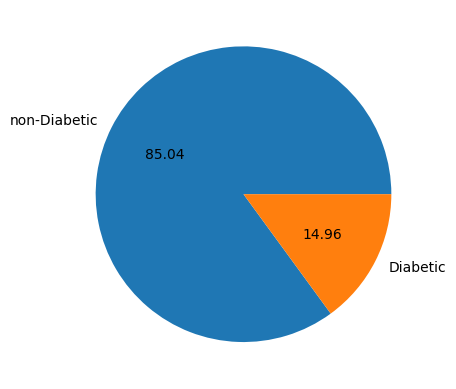

In [12]:
labels=["non-Diabetic","Diabetic"]

plt.pie(df["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' )
plt.show()

# **Diabetes_binary's relation with major factors which couses Diabetes**

**HighBP's Relation with Diabetes_binary**

In [13]:
df["Diabetes_binary_str"]= df["Diabetes_binary"].replace({0:"No-Diabetes",1:"Diabetes"})


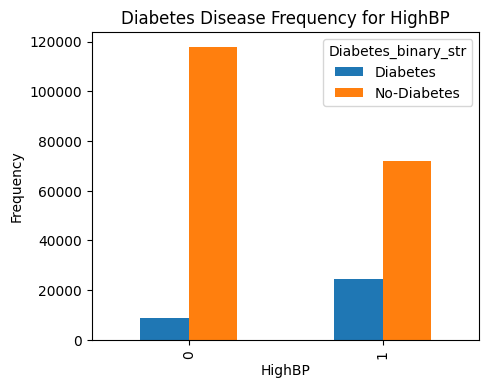

In [14]:
pd.crosstab(df.HighBP,df.Diabetes_binary_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

**HighChol's relation with Diabetes_binary**

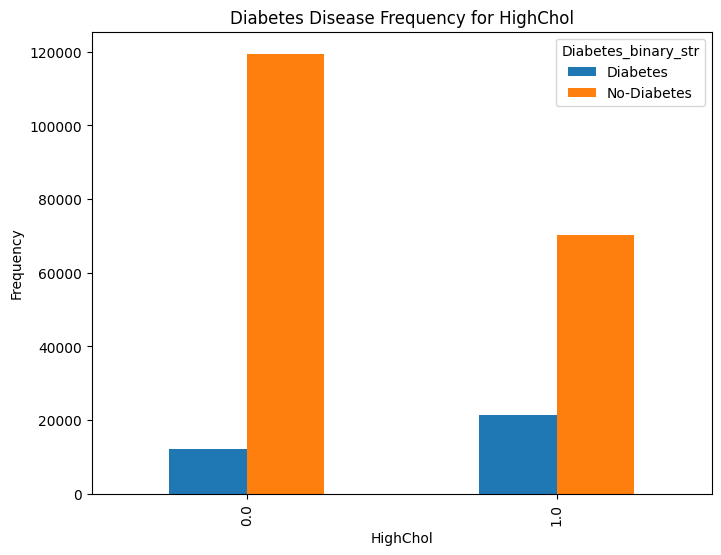

In [15]:
#Checking The relation B/W HighChol and Diabetes

pd.crosstab(df.HighChol,df.Diabetes_binary_str).plot(kind="bar",figsize=(8,6))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

**Relation b/w Smoker ,HvyAlcoholConsump and Diabetes**

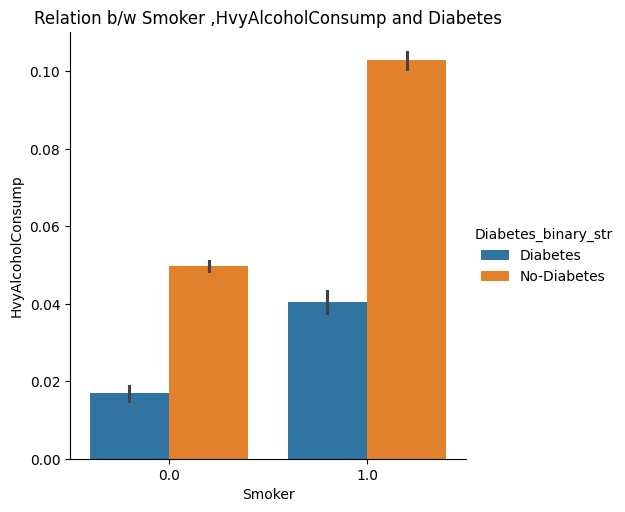

In [16]:
sns.catplot(x="Smoker", y ="HvyAlcoholConsump", data = df, hue="Diabetes_binary_str", kind="bar")  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")
plt.show()

 result:
    smoking and HvyAlcoholConsump both togather increase the risk of diabetes.









**Stroke and HeartDiseaseorAttack's combined effect on Diabetes**

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

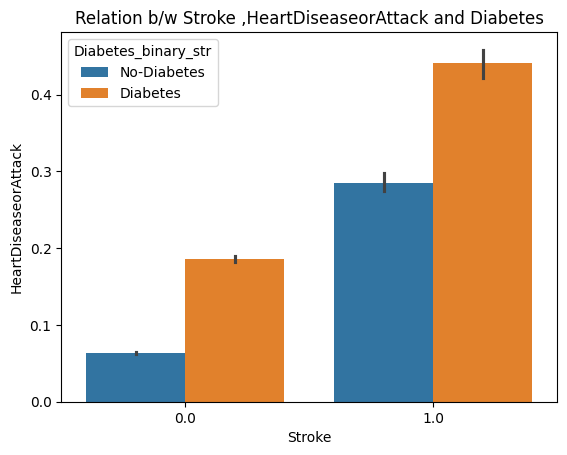

In [17]:
sns.barplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_binary_str")
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")
plt.show()

**life Style : PhysActivity, Fruits and Veggies effect on Diabetes**

**PhysActivity relation with Diabetic_binary**

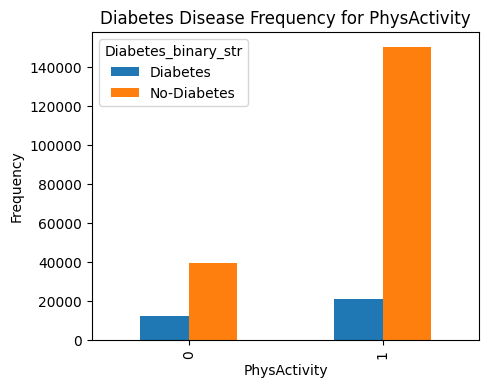

In [18]:
pd.crosstab(df.PhysActivity,df.Diabetes_binary_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

result :

1.Physical activity reduces the risk of diabetes.

**Fruits relation with Diabetic_binary**

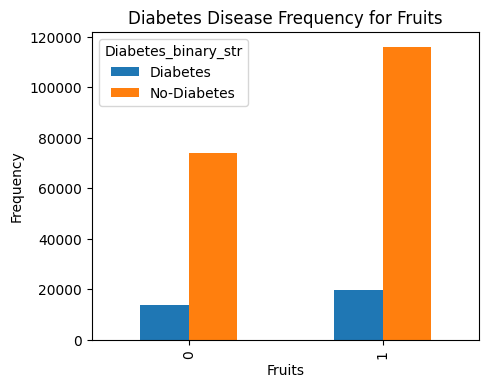

In [19]:
pd.crosstab(df.Fruits,df.Diabetes_binary_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

Result:
    Eating at least one fruit a day reduces the risk of diabetes.

**Veggies relation with Diabetic_binary**

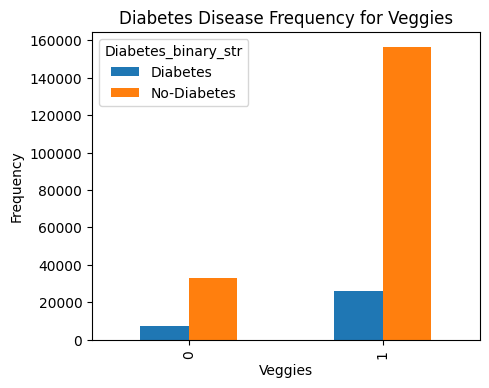

In [20]:
pd.crosstab(df.Veggies,df.Diabetes_binary_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

Result:
    Eating at least one veggies a day slower the risk of diabetes.

**Social : Sex , Age , Education , and Income's effect on Diabetes**

Sex : 0 for Female and 1 for Male

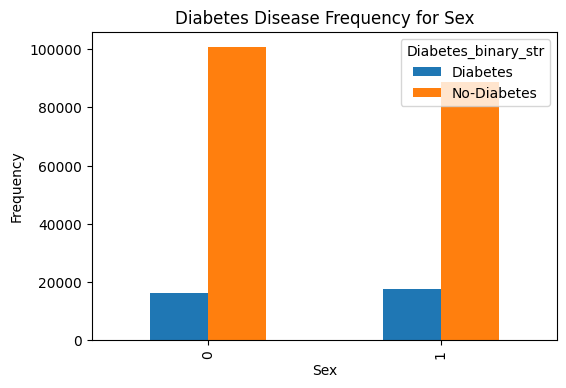

In [21]:
pd.crosstab(df.Sex,df.Diabetes_binary_str).plot(kind="bar",figsize=(6,4))

plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()


Result:
    male and female are equally vulnerable for Diabetes

**Effect of Age on Diabetics**


Age range:  1 Age 18-24
            2 Age 25 to 29 
            ..............
            13 Age 80 or older

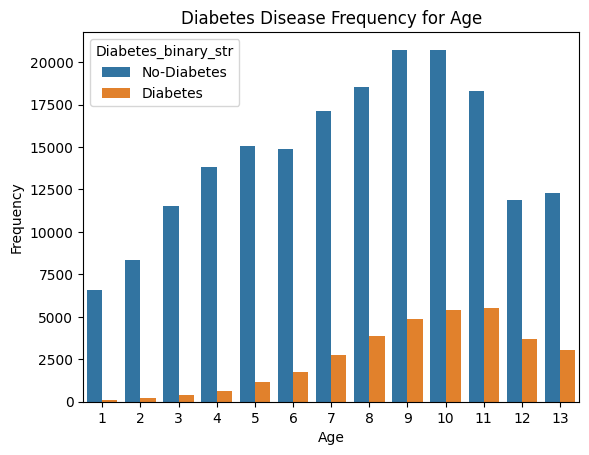

In [22]:
sns.countplot(df,x = "Age",hue="Diabetes_binary_str")
plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()


when the age increase the number of diabetic people also increase


**relation of Education with Diabetic**

1 = Never attended school or only kindergarten
2 = Grades 1 - 8 (Elementary)
3 = Grades 9 - 11 (Some high school)
4 = Grade 12 or GED (High school graduate)
5 = College 1 year to 3 years (Some college or technical school)
6 = College 4 years or more (College graduate)

Education level data from (EDUCA codebook)

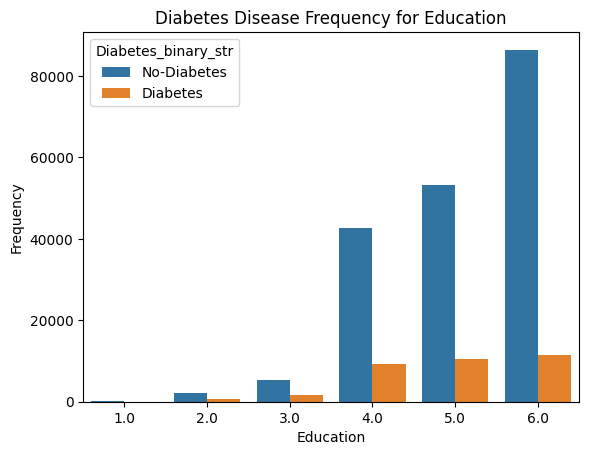

In [23]:
sns.countplot(df,x = "Education",hue="Diabetes_binary_str")
plt.title('Diabetes Disease Frequency for Education')
plt.xlabel("Education")
plt.ylabel('Frequency')
plt.show()


Result:
    As education of people increases, the risk of diabetics decreases

**Relation of Income with Diabetic** 

scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

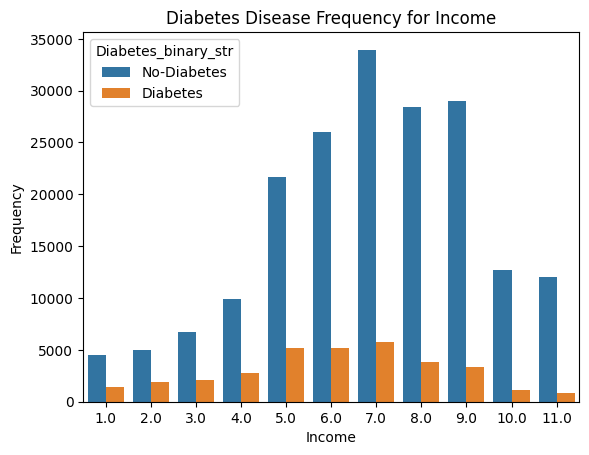

In [24]:
sns.countplot(df,x = "Income",hue="Diabetes_binary_str")
plt.title('Diabetes Disease Frequency for Income')
plt.xlabel("Income")
plt.ylabel('Frequency')
plt.show()


people with lower income has more risk of diabetes than the Higher ones.

In [25]:
df.drop(["Diabetes_binary_str"],axis = 1,inplace = True)
X = df.iloc[:,1:]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223238,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
223239,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
223240,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
223241,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [26]:
y = df.iloc[:,0]
y

0         0.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
223238    1.0
223239    0.0
223240    0.0
223241    0.0
223242    0.0
Name: Diabetes_binary, Length: 223243, dtype: float64

In [27]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.83333333, 0.6       ,
        0.4       ],
       [1.        , 0.        , 1.        , ..., 0.83333333, 0.6       ,
        0.2       ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.6       ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.5       , 1.        ,
        0.9       ],
       [1.        , 0.        , 1.        , ..., 0.75      , 0.6       ,
        0.5       ],
       [0.        , 1.        , 1.        , ..., 0.41666667, 1.        ,
        0.5       ]])

In [28]:

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 1,test_size = 0.3)


In [29]:

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
y_test.values

array([1., 0., 0., ..., 1., 0., 0.])

In [31]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     56901
         1.0       0.45      0.15      0.23     10072

    accuracy                           0.85     66973
   macro avg       0.66      0.56      0.57     66973
weighted avg       0.80      0.85      0.81     66973



In [32]:
y.value_counts()

Diabetes_binary
0.0    189848
1.0     33395
Name: count, dtype: int64

In [33]:
# resolving the imbalance dataset


os = SMOTE()
X_os,y_os  = os.fit_resample(X,y)

In [34]:
X_scaled = scaler.fit_transform(X_os)
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.83333333, 0.6       ,
        0.4       ],
       [1.        , 0.        , 1.        , ..., 0.83333333, 0.6       ,
        0.2       ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.6       ],
       ...,
       [1.        , 0.50695713, 1.        , ..., 0.83333333, 0.69860857,
        0.44930429],
       [0.        , 1.        , 1.        , ..., 0.66666667, 0.76407889,
        0.48203944],
       [0.        , 0.49410625, 1.        , ..., 0.5       , 0.89882125,
        0.5       ]])

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_os,random_state = 1,test_size = 0.3)


In [36]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [37]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     56847
         1.0       0.93      0.88      0.91     57062

    accuracy                           0.91    113909
   macro avg       0.91      0.91      0.91    113909
weighted avg       0.91      0.91      0.91    113909



In [38]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.255750,0.194415,0.073088,0.193560,0.047151,0.097970,0.170951,-0.138871,-0.018654,...,0.032121,0.007739,0.269815,0.026139,0.152252,0.202905,0.036849,0.194307,-0.090391,-0.140398
HighBP,0.255750,1.000000,0.273910,0.106480,0.202854,0.085947,0.124365,0.199827,-0.122232,-0.018986,...,0.056340,-0.014791,0.265983,-0.000652,0.132979,0.202642,0.067519,0.345364,-0.090536,-0.133421
HighChol,0.194415,0.273910,1.000000,0.103972,0.077711,0.073251,0.084490,0.169009,-0.069679,-0.016139,...,0.061483,-0.017440,0.175613,0.012063,0.099847,0.123772,0.026822,0.284168,-0.024131,-0.055145
CholCheck,0.073088,0.106480,0.103972,1.000000,0.041555,-0.008140,0.027560,0.047095,-0.013777,0.020746,...,0.153645,-0.069221,0.051402,-0.010871,0.036263,0.049682,-0.050173,0.104990,0.024604,0.015441
BMI,0.193560,0.202854,0.077711,0.041555,1.000000,0.000947,0.004815,0.032094,-0.153145,-0.076819,...,-0.004306,0.041639,0.237996,0.077107,0.110753,0.191208,0.002109,-0.053822,-0.081918,-0.085963
Smoker,0.047151,0.085947,0.073251,-0.008140,0.000947,1.000000,0.052529,0.105128,-0.081263,-0.059096,...,-0.018418,0.040462,0.147932,0.073303,0.103431,0.114700,0.075547,0.121648,-0.161919,-0.130663
Stroke,0.097970,0.124365,0.084490,0.027560,0.004815,0.052529,1.000000,0.175426,-0.073579,0.005335,...,0.017782,0.018850,0.155228,0.039911,0.127620,0.158769,0.002170,0.131614,-0.055417,-0.110019
HeartDiseaseorAttack,0.170951,0.199827,0.169009,0.047095,0.032094,0.105128,0.175426,1.000000,-0.090599,0.000894,...,0.028537,0.010208,0.233550,0.027122,0.164853,0.189224,0.088515,0.227541,-0.071959,-0.116598
PhysActivity,-0.138871,-0.122232,-0.069679,-0.013777,-0.153145,-0.081263,-0.073579,-0.090599,1.000000,0.106626,...,0.019358,-0.042783,-0.270476,-0.103503,-0.238520,-0.275541,0.058559,-0.121717,0.197833,0.226611
Fruits,-0.018654,-0.018986,-0.016139,0.020746,-0.076819,-0.059096,0.005335,0.000894,0.106626,1.000000,...,0.014377,-0.022840,-0.061959,-0.046342,-0.020573,-0.018437,-0.053927,0.072726,0.070470,0.035935


In [39]:
df1 = df.corr()
df1["Diabetes_binary"].sort_values()

Income                 -0.140398
PhysActivity           -0.138871
Education              -0.090391
HvyAlcoholConsump      -0.062823
Veggies                -0.037718
Fruits                 -0.018654
NoDocbcCost             0.007739
MentHlth                0.026139
AnyHealthcare           0.032121
Sex                     0.036849
Smoker                  0.047151
CholCheck               0.073088
Stroke                  0.097970
PhysHlth                0.152252
HeartDiseaseorAttack    0.170951
BMI                     0.193560
Age                     0.194307
HighChol                0.194415
DiffWalk                0.202905
HighBP                  0.255750
GenHlth                 0.269815
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

Feature extraction

In [40]:
df.drop(["NoDocbcCost","Veggies","Fruits","MentHlth","AnyHealthcare","Sex"],inplace = True,axis = 1)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,0,5.0,20.0,0.0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,0,2.0,0.0,0.0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,0,5.0,30.0,1.0,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,3.0,0.0,1.0,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223238,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,0,4.0,0.0,0.0,10,2.0,3.0
223239,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,0,2.0,0.0,0.0,3,4.0,5.0
223240,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,7,6.0,10.0
223241,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,10,4.0,6.0


In [41]:
X = df.iloc[:,1:]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1.0,1,15.0,1.0,0.0,0.0,0,0,5.0,20.0,0.0,11,4.0,5.0
1,1,0.0,1,28.0,0.0,0.0,1.0,0,0,2.0,0.0,0.0,11,4.0,3.0
2,1,1.0,1,33.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,9,4.0,7.0
3,0,1.0,1,29.0,0.0,1.0,1.0,1,0,5.0,30.0,1.0,12,3.0,4.0
4,0,0.0,1,24.0,1.0,0.0,0.0,0,0,3.0,0.0,1.0,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223238,1,1.0,1,21.0,0.0,0.0,0.0,1,0,4.0,0.0,0.0,10,2.0,3.0
223239,1,0.0,1,25.0,1.0,0.0,0.0,1,0,2.0,0.0,0.0,3,4.0,5.0
223240,0,1.0,1,31.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,7,6.0,10.0
223241,1,0.0,1,24.0,0.0,0.0,0.0,1,0,2.0,0.0,0.0,10,4.0,6.0


In [42]:
y = df.iloc[:,1]
y


0         0
1         1
2         1
3         0
4         0
         ..
223238    1
223239    1
223240    0
223241    1
223242    0
Name: HighBP, Length: 223243, dtype: int64

In [43]:

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.83333333, 0.6       ,
        0.4       ],
       [1.        , 0.        , 1.        , ..., 0.83333333, 0.6       ,
        0.2       ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.6       ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.5       , 1.        ,
        0.9       ],
       [1.        , 0.        , 1.        , ..., 0.75      , 0.6       ,
        0.5       ],
       [0.        , 1.        , 1.        , ..., 0.41666667, 1.        ,
        0.5       ]])

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 1,test_size = 0.3)


In [45]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37786
           1       1.00      1.00      1.00     29187

    accuracy                           1.00     66973
   macro avg       1.00      1.00      1.00     66973
weighted avg       1.00      1.00      1.00     66973



In [47]:
import pickle

# Open a file named 'classifier.pkl' in write-binary mode
pickle_out = open("classifier.pkl","wb")

# Dump the 'rf' model into the file
pickle.dump(rf, pickle_out)

# Close the file
pickle_out.close()

In [48]:
# Open a file named 'scaler.pkl' in write-binary mode
pickle_out = open("scaler.pkl","wb")

# Dump the 'scaler' object into the file
pickle.dump(scaler, pickle_out)

# Close the file
pickle_out.close()

## Conclusion

1. major features effect the Diabetes are : HIghBP, HighChol, BMI, Stroke, GenHlth,  MentHlth, PhysHlth, Age , Eduation and Income.
2. Features which increases the risk of Diabetes togather are : Smoking and HvyAlcoholConsump , Stroke and HeartDiseaseorAttack , HighBP and HighChol
3. Feature  which is least effective on Diabetes , but they can help in dicreasing the risk Diabetes are : PhysActivity , Fruits , Veggies , AnyHealthcare , CholChek.